# **Market Analysis of the Home Decor and Lifestyle Sector: Trends, Competition, and Consumer Insights**

###**Introduction**

The home decor and lifestyle industry is dynamic in nature, due to the evolution of consumer preferences, competitive strategies within the market, and purchase behaviors. The following project intends to analyze the trend of the market, determine competitors and their respective strategies, and understand customer purchase behavior.

The study will cover data onboarding, insight generation, and visualization to derive meaningful patterns from the collected data. In addition, sample code snippets will be used to demonstrate the analytical approach. Findings will be contributed toward a comprehensive understanding of the home decor and lifestyle market, which will enable data-driven decision-making.

###**Key Markret Trends and Competitor Market Strategy in Home Decor and Lifestyle**

The competition in the home decor and lifestyle market in India is very intense, with many big players competing for different types of customers. Large brands and chains such as IKEA, Pepperfry, Urban Ladder, and Home Centre are leaders in this market. They have wide product offerings, effective marketing strategies, and flexible prices.

At the same time, small brands such as FabIndia, Chumbak, Wooden Street, The Décor Kart, Westside Home, Ellementry, and Nestasi have found their own space with a focus on quality, craftsmanship, and sustainability. Let's see what strategies they have used.

Lets find out the Google trends data in Home Decor and Lifestyle sector.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import backoff
import pandas as pd
from pytrends.request import TrendReq

@backoff.on_exception(backoff.expo, Exception, max_tries=5)
def get_trends():
    """Fetches Google Trends data with exponential backoff on failures."""
    pytrends = TrendReq(hl='en-US', tz=330)
    keywords = ["home decor","modern furniture","bohemian decor","personalized products","smart products"]
    pytrends.build_payload(keywords, cat=0, timeframe='today 5-y', geo='IN', gprop='')

    data = pytrends.interest_over_time()

    if data.empty:
        raise ValueError("No data retrieved. Try changing keywords or timeframe.")

    return data

try:
    trend_data = get_trends()  # Call the function to fetch trends

    # Save to CSV only if data is retrieved
    trend_data.to_csv("google_trends_data.csv")
    print("✅ Data saved successfully to 'google_trends_data.csv'")

except Exception as e:
    print(f"❌ Error fetching trends: {e}")




In [ ]:
import pandas as pd
file_path = "/content/drive/My Drive/merged_homedecor_and_lifestyle.xlsx"
df = pd.read_excel(file_path)
print(df.head(5))  # Display first few rows


        Date  Home Decor  Modern Furniture  Bohemian Decor  \
0 2020-02-02          47                 4               0   
1 2020-02-09          48                 4               0   
2 2020-02-16          53                 4               0   
3 2020-02-23          51                 4               0   
4 2020-03-01          54                 4               0   

   Personalized Products  Smart Products  
0                      0              50  
1                      0              45  
2                      0              48  
3                      0              51  
4                      0              52  


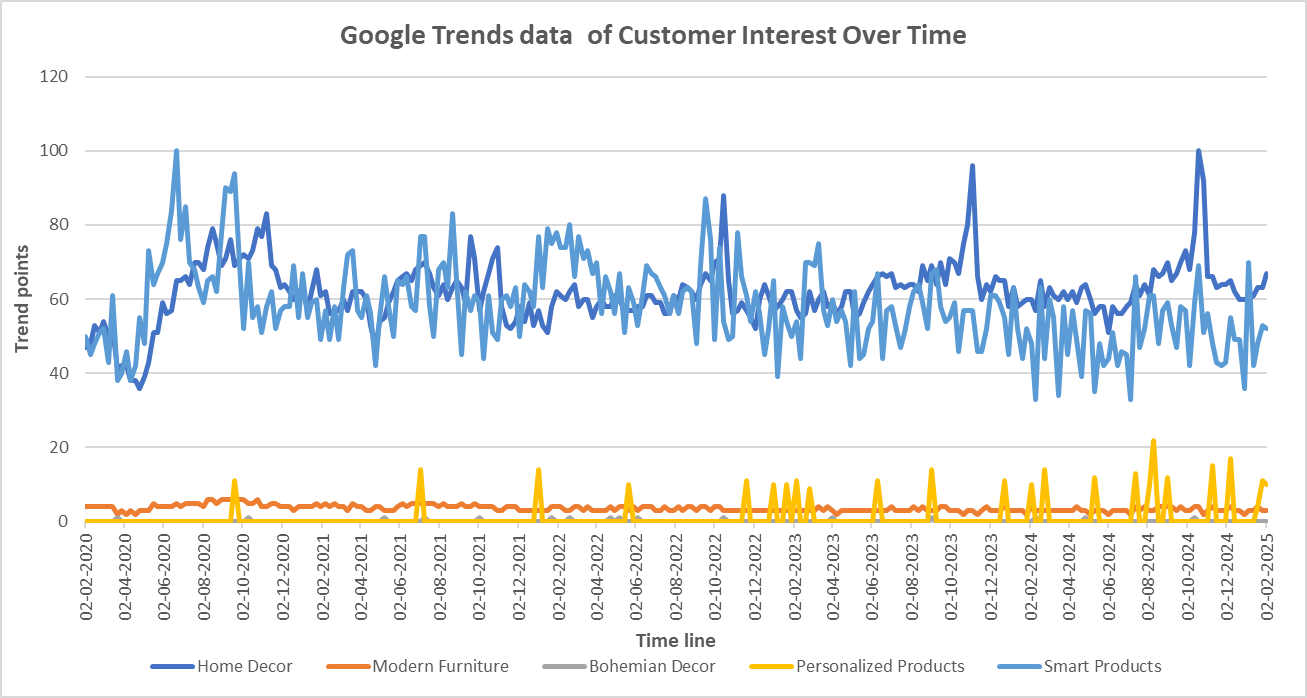

The most recent trends insights:

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_excel("merged_homedecor_and_lifestyle.xlsx", index_col=0)

# Clean column names (handle spaces and capitalization)
df.columns = df.columns.str.strip().str.lower()

# Debug: Print available columns
print("Column Names in DataFrame:", df.columns)

# Extract max search interest values
insights = {
    "Category": ["Home Decor", "Modern Furniture", "Bohemian Decor", "Personalized Products", "Smart Products"],
    "Max Search Interest": [
        df["home decor"].max() if "home decor" in df.columns else "Column Missing",
        df["modern furniture"].max() if "modern furniture" in df.columns else "Column Missing",
        df["bohemian decor"].max() if "bohemian decor" in df.columns else "Column Missing",
        df["personalized products"].max() if "personalized products" in df.columns else "Column Missing",
        df["smart products"].max() if "smart products" in df.columns else "Column Missing",
    ]
}

# Convert to DataFrame
insights_df = pd.DataFrame(insights)

# Save max search interest insights to a new Excel file
insights_df.to_excel("insights.xlsx", index=False)

# Save last 20 rows of trends data to another sheet
with pd.ExcelWriter("insights.xlsx", mode="a", engine="openpyxl") as writer:
    df.tail(20).to_excel(writer, sheet_name="Recent Trends")

print("Insights saved to 'insights.xlsx'")


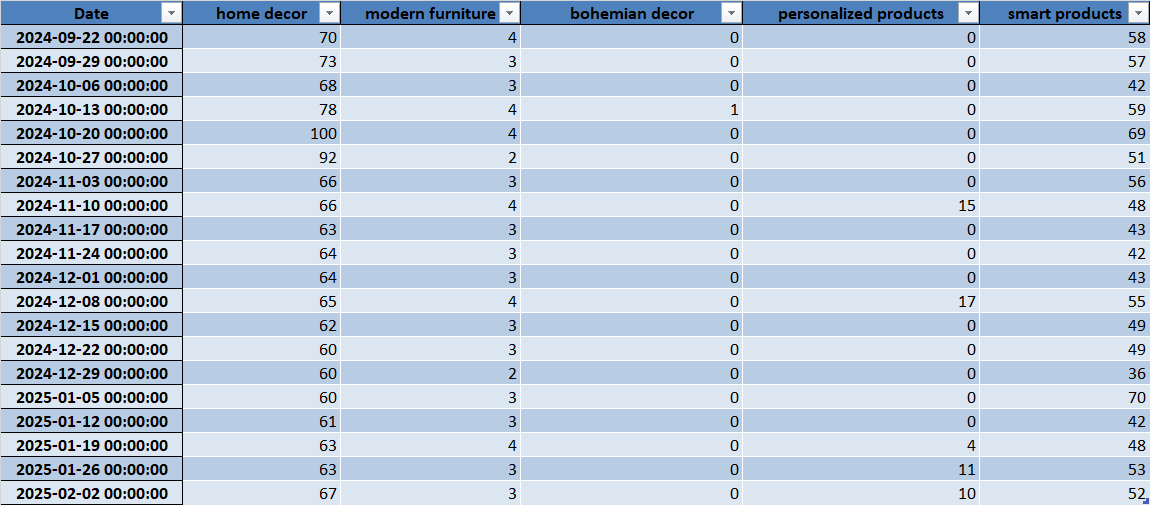

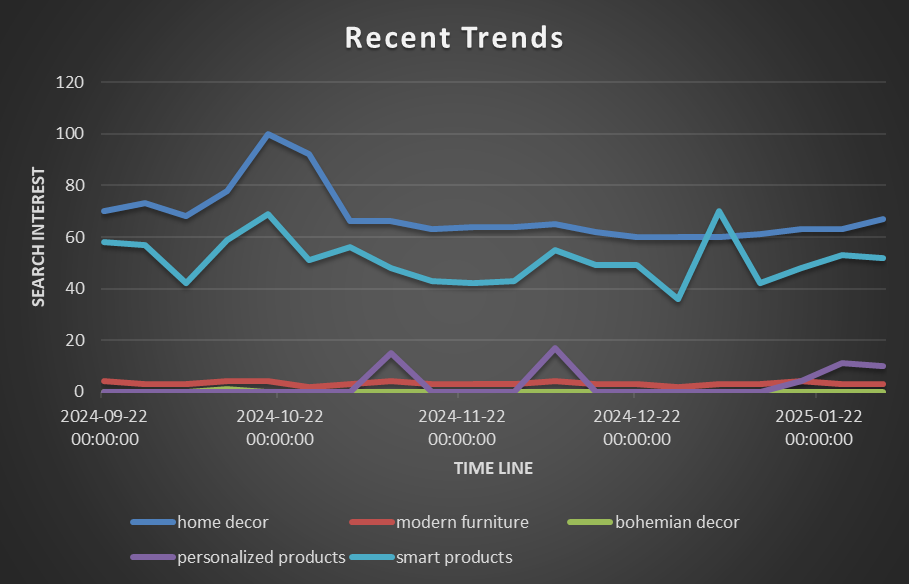

### **Competitor Market Strategy analysys in Home Decor and Lifestyle.**


Here is a table which provides the information of competitors Marketing stratergies, Business stratergies, Products, Pricing, Technology integration, Innovation, Distribution, Customer engagement.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define competitors and their attributes
competitors = [
    "IKEA", "Pepperfry", "Urban Ladder", "FabIndia", "Home Centre",
    "Chumbak", "Wooden Street", "The Décor Kart", "Westside Home", "Ellementry", "Nestasi"
]

# Data for visualization
data = {
    "Competitor": competitors,
    "Product Range": [10, 9, 8, 7, 8, 6, 8, 7, 7, 6, 5],  # Scale: 1-10
    "Pricing": ["Budget", "Mid-Range", "Mid-Range", "Mid-Range", "Affordable Luxury",
                "Mid-Range", "Mid-Range", "Mid-Range", "Mid-Range", "Premium", "Mid-Range"],
    "Marketing Channels": ["TV & Digital", "Social Media", "Google Ads", "Influencers", "TV & Digital",
                           "Social Media", "Google Ads", "Social Media", "TV & Digital", "Influencers", "Social Media"],
    "Technology": [9, 8, 8, 5, 6, 4, 7, 5, 6, 5, 4],  # Scale: 1-10 (AR, AI, 3D tools)
    "Distribution": ["Hybrid", "Online & Experience Zones", "Hybrid", "Hybrid", "Hybrid",
                     "Online & Retail", "Online & Experience Zones", "Online Only", "Retail", "Retail", "Online Only"],
    "Customer Engagement": ["Excellent", "Good", "Excellent", "Very Good", "Good",
                            "Very Good", "Excellent", "Good", "Good", "Excellent", "Good"]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Figure Setup
fig, axes = plt.subplots(3, 2, figsize=(18, 12))
fig.suptitle("Competitor Analysis in Home Decor Industry", fontsize=16)

# Bar Chart - Product Range
sns.barplot(x="Product Range", y="Competitor", data=df, ax=axes[0, 0], palette="Blues_r")
axes[0, 0].set_title("Product Range Comparison")

# Bar Chart - Pricing Strategy
pricing_counts = df["Pricing"].value_counts()
sns.barplot(x=pricing_counts.index, y=pricing_counts.values, ax=axes[0, 1], palette="coolwarm")
axes[0, 1].set_title("Pricing Strategy Distribution")
axes[0, 1].set_ylabel("Number of Competitors")

# Pie Chart - Marketing Channels
marketing_counts = df["Marketing Channels"].value_counts()
axes[1, 0].pie(marketing_counts, labels=marketing_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
axes[1, 0].set_title("Marketing Channels Usage")

# Pie Chart - Distribution Strategy
distribution_counts = df["Distribution"].value_counts()
axes[1, 1].pie(distribution_counts, labels=distribution_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"))
axes[1, 1].set_title("Distribution Strategy")

# Heatmap - Technology Integration
tech_df = df.pivot_table(index="Competitor", values="Technology")
sns.heatmap(tech_df, annot=True, cmap="YlGnBu", linewidths=0.5, ax=axes[2, 0])
axes[2, 0].set_title("Technology Integration Heatmap")

# Stacked Bar Chart - Customer Engagement
engagement_counts = df["Customer Engagement"].value_counts()
sns.barplot(x=engagement_counts.index, y=engagement_counts.values, ax=axes[2, 1], palette="Set1")
axes[2, 1].set_title("Customer Engagement Strategies")
axes[2, 1].set_ylabel("Number of Competitors")

# Adjust layout and show plots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


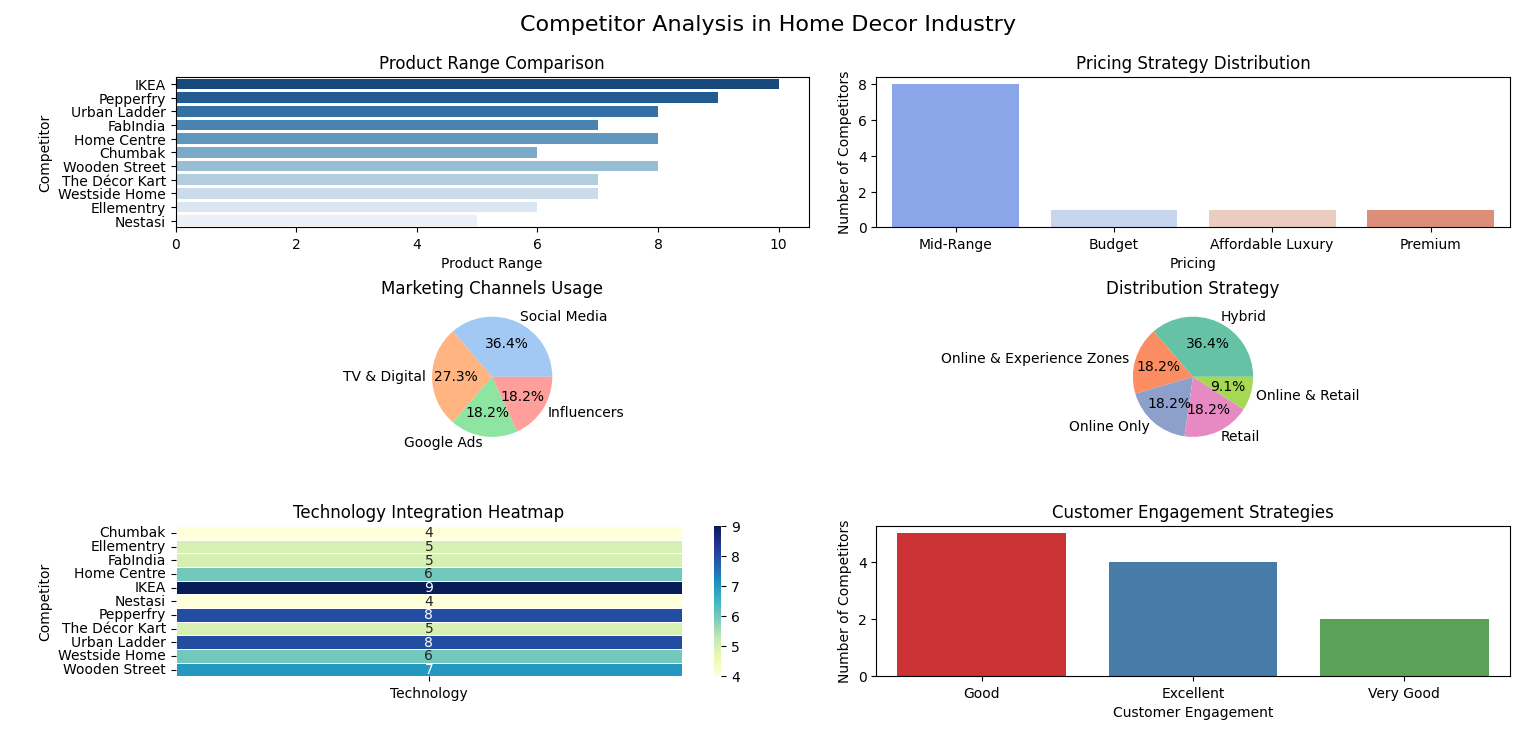

### **key insights**

**1.Product Offerings**

*   IKEA & Pepperfry: It provides a vast variety of modern and functional
furniture, catering to budget-conscious as well as premium customers.

*   Urban Ladder & Home Centre: Emphasize stylish, high-quality furniture; Urban Ladder focuses on designer collections while Home Centre balances price with luxury.

*   FabIndia & Chumbak: Differentiate through fusion designs. FabIndia specializes in handcrafted ethnic decor, whereas Chumbak offers quirky and vibrant aestheticization.

*   The Décor Kart & Nestasi: Targeting style-conscious customers with stylish and competitively priced home furnishings.

*  Ellementry: Luxury, handcrafted home decor with sustainability and fine craftsmanship.


**2. Pricing Strategies**

*  Affordable Range: IKEA leads with low prices and frequent seasonal discounts to make stylish home decor accessible to more people.

*  Mid-to-Premium Range: Pepperfry, Urban Ladder, FabIndia, and Wooden Street balance quality with competitive pricing, usually running discounts and EMI options.

*  Luxury Market: Home Centre is marketed at the higher level of the middle class. On the other hand, Ellementry comes up as a luxury brand offering more high-value and handmade goods.

**3. Marketing Mix**
*  Social Media & Influencer Marketing: Pepperfry, Urban Ladder, and Chumbak largely employ the usage of influencers for generating attention for their brand.

*  Media and TV Advertisement: IKEA, Home Centre, and Westside Home employs advertising to appeal to more mass population.

*  Digital & Search Engine Ads: Wooden Street and The Décor Kart rely on targeted online advertising (Google Ads, SEO, etc.) to drive sales.
  
*  Experiential Marketing: Pop-up stores and offline brand experiences help smaller brands like Chumbak and The Décor Kart connect with customers beyond digital platforms.

*  Omnichannel Approach: IKEA and Urban Ladder seamlessly blend digital and physical store experiences, ensuring a smooth customer journey.

**4. Customer Engagement & Experience**
*  Design consultation is made available by Urban Ladder whereas on Wooden Street one can obtain 3D preview customized furniture.

*  Reward Scheme/Exclusive deals on purchases offered to customers -Chumbak-Fab India.

*  Easy Transaction-IKEA ensures easy experiences with returns by simple return methods. Pepperfry also strives hard for it.

*  Offline Shopping Events-For enhanced customer delight through in-shop activities and offering the option to avail personalizations-Westside home & Home Center.

**5.Technology&innovation**

*  The IKEA app lets customers see how furniture will look in their homes before they buy anything online.

*  AI-Powered Recommendations: Pepperfry, Urban Ladder, and Wooden Street engage AI in product selection for customers.

*  3D Visualization: Urban Ladder and Wooden Street provide 3D design tools with the options to review how furniture will look in given spaces.

*  Tech Gaps: Chumbak, FabIndia, and Home Centre have caught up very nicely in e-commerce but lack in technologically driven purchasing experience.

**6.Distribution Channels**

*  Hybrid Approach: IKEA offers seamless integration of physical stores with online sales.

*  Online-Focused: Pepperfry and Wooden Street primarily sell through online platforms but offer experience zones for product trials.

*  Balanced Presence: Urban Ladder, FabIndia, and Home Centre have both physical and online stores for wider reach.

*  Niche Online Brands: The Décor Kart and Nestasi primarily operate online, catering to a digitally savvy audience.

**7.Sustainability & Future Trends**

*  Eco-Friendly Initiatives:
IKEA is already a leader with renewable materials, energy-efficient process, and its recycling programs.

*  FabIndia, Chumbak, and Wooden Street are pro-artisan community and sustainable.

*  Ellementry is for that handmade, ecological lifestyle.

*  Green Product Innovation: Home Centre and Westside Home are launching a sustainable furniture lines.

*  Growing Consumer Demand: There is an ever-increasing sensitivity towards the impact of environmental causes. Brands talking about sustainability and environmental responsibility can expect customer retention in the long run.

###**Actionable recommendations for Products Optimization**
Brands must focus on sustainability, such as using eco-friendly materials, carbon footprint reduction, and recycling. Technology integration with AR, AI-driven recommendations, and 3D visualization tools to enhance customer experience.

The customer-centric approach with personalized services, loyalty programs, and seamless omnichannel experiences. Strategic distribution of their products, where they must increase their online as well as offline presence for reaching the maximum customer base and enhancing customer convenience.

By adopting all these strategies, home decor brands can not only compete effectively but also build strong relationships with their customers over the long term in an evolving market.


###**Factors influencing customer purchasing decisions.**

The factors that drive customer purchasing behavior in the home decor and lifestyle industry are personal lifestyle and taste, cultural trends, social influences, economic factors, perceived quality, brand image, design aesthetics, environmental concerns, convenience, price point, home renovation needs, and social media and influencer influence driving a customer to buy a certain product or item in home decor and lifestyle.

####**Main Factors Explained**

**Lifestyle:**
Individual lifestyle and interests can also impact one's taste and choices of what decor goes on his home.

**Taste and Aesthetics:** the type of colors and hues he would appreciate or even admire. The life cycle and aging of the person will dictate which types of decors would work well with that phase. The type of personality - if shy, perhaps shy decorations.

**Social:** influence through social interactions among friends, including who's setting trends in society

**Family dynamics:** The needs of a family and family decisions regarding how to decorate home
Social class: To convey a certain identity through the selections of home decorations

####**Cultural Factors:**

**Trend of locality:** Regionalized design and culture and most prominent styles within an area
Values of the society: Cultural, traditional, or religious beliefs shaping home decor selections

**Economic Factors:**
Family income: Money available to buy and affordability limitations

**Economic security:** Willingness to spend on home decor at a time of economic uncertainty
Perceived quality: Durability, craftsmanship, and materials

**Brand image:** Perception of reputation and trust with a specific home decor brand
Design aesthetics: Originality, innovation, and style of the product

**Functionality:** The effectiveness of a product in serving its purpose

**Sustainability:** Environmentally friendly, green materials, and more
Marketing and Shopping Experience Factors:

**Visual merchandising:** In-store presentation of products that guides purchasing decisions
Online

**shopping experience:** User-friendliness, product information, and reviews on websites

**Influencer marketing:** Endorsements from social media influencers
Sales promotions and discounts: Price incentives to purchase.


Here is the sample data to analyse customer behaviour:

### **Customer data:**

In [ ]:
import pandas as pd
file_path = "/content/drive/My Drive/ASSIGNMENT/customer_data.csv"
df = pd.read_csv(file_path)
print(df.head(5))  # Display first few rows

   customer_id  total_spent  purchase_frequency  num_returns
0            1        45080                  19            0
1            2        41447                  17            2
2            3         9208                  19            0
3            4        19589                   5            0
4            5        44484                   9            0


### **Customer reviews:**

In [ ]:
import pandas as pd
file_path = "/content/drive/My Drive/ASSIGNMENT/customer_reviews.csv"
df = pd.read_csv(file_path)
print(df.head(5))  # Display first few rows

                                       review  rating
0            Great quality and fast delivery!       4
1       Terrible experience, won't buy again.       5
2        Loved the product, highly recommend!       3
3                        Not worth the price.       5
4  Amazing customer service and good quality.       5


### **Sales data:**

In [ ]:
import pandas as pd
file_path = "/content/drive/My Drive/ASSIGNMENT/sales_data.csv"
df = pd.read_csv(file_path)
print(df.head(5))  # Display first few rows

         date  sales  ad_spend  discount_rate
0  2023-01-01   1623       491       0.140907
1  2023-01-02   1371       262       0.292946
2  2023-01-03    630       388       0.290612
3  2023-01-04   1832       478       0.112946
4  2023-01-05   1269       360       0.174312


### **Building a ML model:**

I have used Python code for Sentiment Analysis, K-Means Clustering, and Predictive Modeling (XGBoost & Linear Regression). The code is structured in three parts:

1.Sentiment Analysis on Customer Reviews.

2.Customer Segmentation using K-Means Clustering.

3.Sales Prediction using Linear Regression & XGBoost.

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load Data
reviews_df = pd.read_csv("customer_reviews.csv")
sales_df = pd.read_csv("sales_data.csv")
customer_df = pd.read_csv("customer_data.csv")

### 1️. Sentiment Analysis on Customer Reviews ###
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^a-zA-Z0-9 ]', '', text)
        return text.lower()
    return ""

reviews_df['cleaned_review'] = reviews_df['review'].apply(clean_text)

analyzer = SentimentIntensityAnalyzer()
reviews_df['sentiment_score'] = reviews_df['cleaned_review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
reviews_df['sentiment'] = reviews_df['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Sentiment Distribution Visualization
sns.countplot(data=reviews_df, x='sentiment', palette='coolwarm')
plt.title("Sentiment Analysis of Customer Reviews")
plt.show()

### 2️. Customer Segmentation using K-Means Clustering ###
scaler = StandardScaler()
customer_features = customer_df[['total_spent', 'purchase_frequency', 'num_returns']].dropna()
scaled_features = scaler.fit_transform(customer_features)

# Finding optimal clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

# Applying K-Means with optimal clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
customer_df['cluster'] = kmeans.fit_predict(scaled_features)

# Visualizing Clusters
sns.scatterplot(x=customer_df['total_spent'], y=customer_df['purchase_frequency'], hue=customer_df['cluster'], palette='viridis')
plt.title("Customer Segmentation")
plt.show()

### 3️. Sales Prediction using Linear Regression & XGBoost ###
sales_df['date'] = pd.to_datetime(sales_df['date'], errors='coerce')
sales_df = sales_df.dropna(subset=['date'])
sales_df['month'] = sales_df['date'].dt.month  # Extract month feature

features = ['month', 'ad_spend', 'discount_rate']
target = 'sales'

X = sales_df[features].dropna()
y = sales_df.loc[X.index, target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

# XGBoost Model
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)

# Comparing Results
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual Sales", marker='o')
plt.plot(y_pred_lr, label="Linear Regression Prediction", linestyle='dashed')
plt.plot(y_pred_xgb, label="XGBoost Prediction", linestyle='dotted')
plt.legend()
plt.title("Sales Prediction: Actual vs Predicted")
plt.show()

print("Sales Prediction Model Completed!")


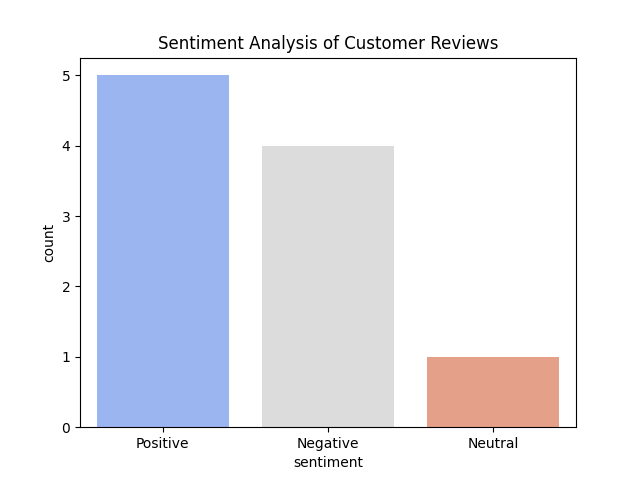

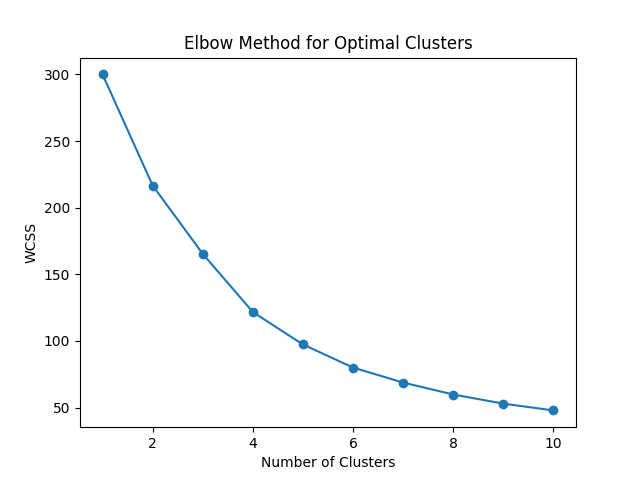

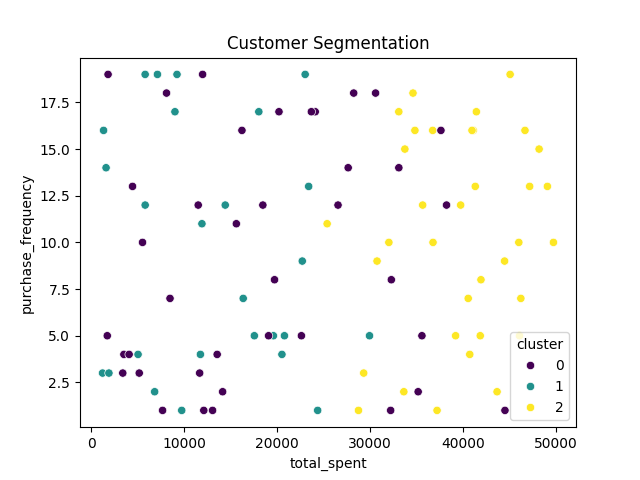

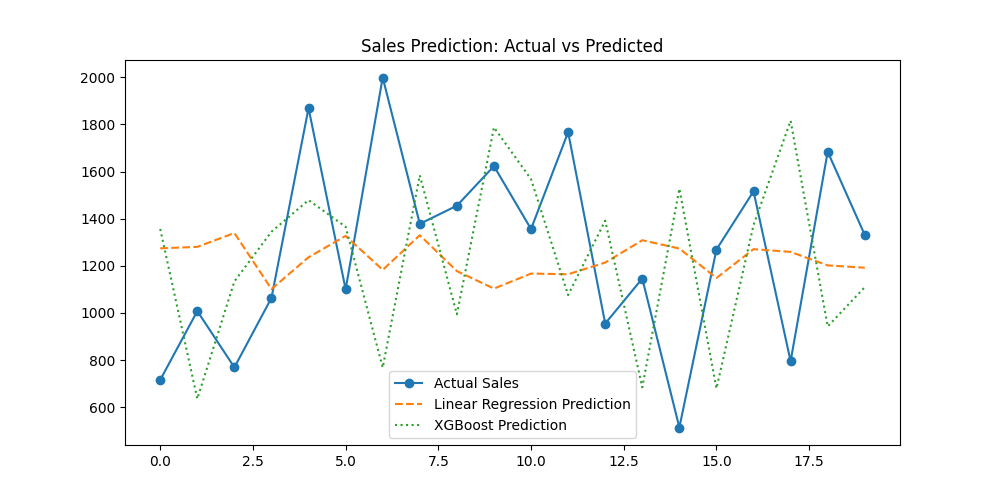

#**Charts Summary:**


Summary of the charts here is very brief.

1.**Customer Segmentation**:

The scatter plot displayed represents customer segmentation on spending and purchase frequency basis. Three clusters are present, shown with three different colors. It can represent three groups of customers as a premium customer, even if they are more expensive and frequent, while others who are less expensive fall within the other ranges.

2.**Elbow Method for the Best Number of Clusters**

In elbow curve, it has the WCSS plot against the number of clusters. The curve in the graph suggests that the optimal number of cluster appears to be about 3 because the curve for WCSS seems to have flattened after this point.

3.**Sales Prediction (Actual vs Predicted)**:

The line chart compares actual sales with predictions from Linear Regression and XGBoost models. The actual sales values show high fluctuations, while the predicted values (especially from Linear Regression) seem smoother. The XGBoost model captures some trends better than the Linear Regression model.

4.**Customer review sentiment analysis:**

A bar graph of customer reviews' sentiment, which shows how most of them are positive with negative ones right after and only a few which are neutral and indicate that this is the least common experience the customers have of the product in question.

###**Conclusion**

This analysis of the home décor and lifestyle sector has been valuable for understanding market patterns, competitive strategies, and customer purchasing behaviors. Key patterns have been identified by leveraging data onboarding, visualization, and analytical techniques to promote data-driven decision-making.

Findings The important market trends and consumer preferences indicate competitive positioning to be employed during strategic planning in order to pursue business growth. Further research combined with constant observation of the flow of data shall help provide precision and dynamism in this moving market trend.

#**References**

1. https://www.inventiva.co.in/trends/top-10-best-home-decor-brands/#google_vignette

2. https://blog.crobox.com/article/home-furnishings-buying-behaivor#:~:text=In%20the%20home%20industry%2C%20many,aesthetic%2C%20e.g.%2C%20hedonic).

3. https://www.statista.com/outlook/cmo/furniture/home-decor/india#revenue